In [160]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# other libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [161]:
# import dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [162]:
# simple linear regression
df_linear = df[["age", "fare"]]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [163]:
df_linear.age.fillna(value = df_linear["age"].mean(), inplace=True)

C:\Users\Optimus\AppData\Local\Temp\ipykernel_5964\1333599115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value = df_linear["age"].mean(), inplace=True)


In [164]:
df_linear.isnull().sum() /len(X)*100

age     0.0
fare    0.0
dtype: float64

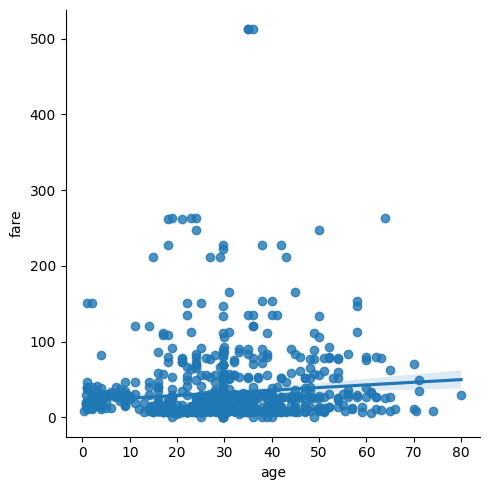

In [165]:
# plot
sns.lmplot(data = df_linear, x="age", y="fare")

<AxesSubplot:ylabel='age'>

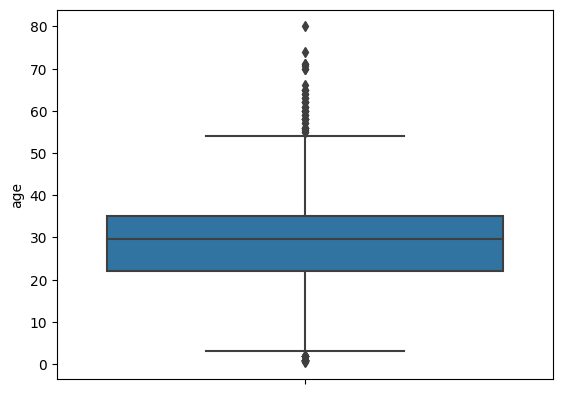

In [166]:
sns.boxplot(data = df_linear, y="age")

In [167]:
df_linear = df_linear[(df_linear["age"] > 8) & (df_linear["age"] < 50)]

<AxesSubplot:ylabel='age'>

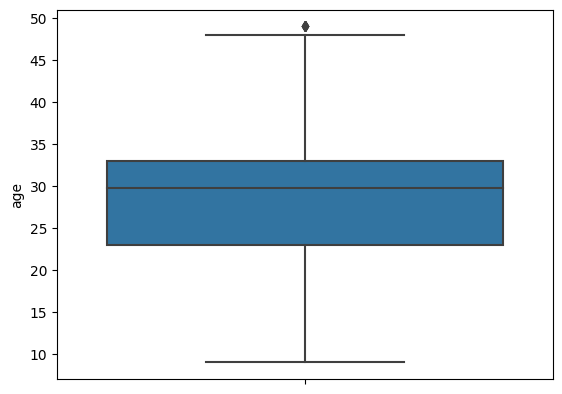

In [168]:
sns.boxplot(data = df_linear, y="age")

<AxesSubplot:ylabel='fare'>

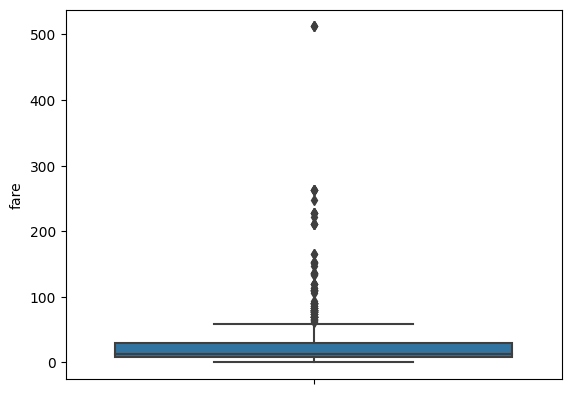

In [169]:
sns.boxplot(data = df_linear, y="fare")

In [170]:
df_linear = df_linear[(df_linear["fare"] > 1) & (df_linear["fare"] < 40)]

<AxesSubplot:ylabel='fare'>

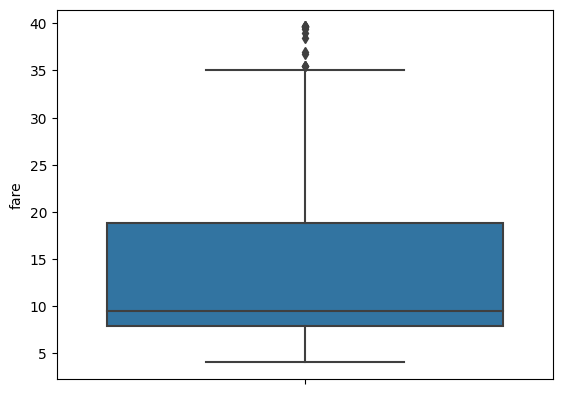

In [171]:
sns.boxplot(data = df_linear, y="fare")

In [172]:
X = df_linear[["age"]]
y = df_linear["fare"]

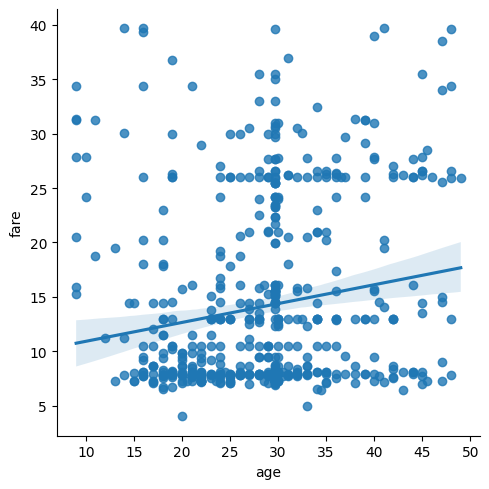

In [173]:
sns.lmplot(data = df_linear, x="age", y="fare")

In [186]:
model = LinearRegression()

# train the model
model.fit(X,y)

# prediction
model.predict([[55]])

c:\Users\Optimus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.7162485])

In [175]:
# model evaluation with metrics
# 1. r2
# 2. mean squared Error
# 3. MAE
# 4. RMSE

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

# model
model = LinearRegression()

# train
model.fit(X_train, y_train)

# prediction
predictions = model.predict(X_test)

<AxesSubplot:xlabel='fare'>

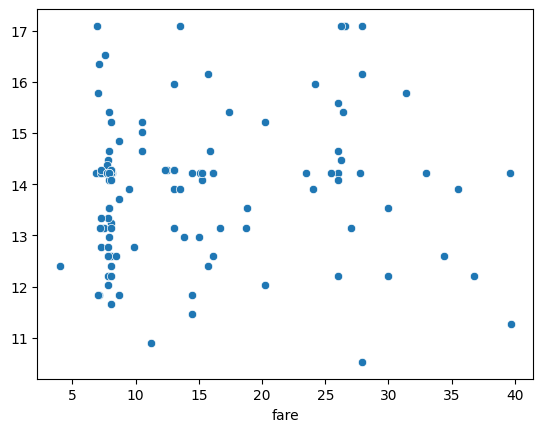

In [188]:
# compare
sns.scatterplot(x = y_test, y = predictions)

In [189]:
model.score(X_test, y_test)

-0.0004467159591525771

In [190]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MAE = mean_absolute_error(y_true = y_test, y_pred = predictions)
MSE = mean_squared_error(y_true = y_test, y_pred = predictions)
RMSE = mean_squared_error(y_true = y_test, y_pred = predictions, squared = False)
R2 = r2_score(y_true = y_test, y_pred = predictions)
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("R_Squred: ", R2)

MAE:  6.995980123826877
MSE:  76.81278762787778
RMSE:  8.764290480573871
R_Squred:  -0.0004467159591525771


In [191]:
RMSE = np.sqrt(MSE)
RMSE

8.764290480573871